# Try to build a classifier for the MNIST dataset that achieves over
# 97% accuracy on the test set. Hint: the KNeighborsClassifier
# works quite well for this task; you just need to find good
# hyperparameter values (try a grid search on the weights and
# n_neighbors hyperparameters).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
n_sample,nx,ny=x_train.shape
x_train=x_train.reshape((n_sample,nx*ny))

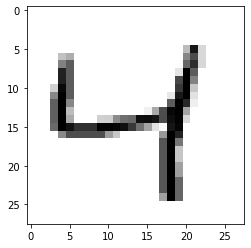

In [ ]:
some_digit=x_train[2]
some_digit_image=some_digit.reshape(28,-1)
plt.imshow(some_digit_image,cmap='binary')
plt.show()

In [ ]:
y_train=y_train.astype(np.uint8)
y_test=y_test.astype(np.uint8)

In [ ]:
y_train4=(y_train==4)
y_test4=(y_test==4)
print(y_train4)

[False False  True ... False False False]


In [ ]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train4)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNN,x_train,y_train4,cv=3,scoring='accuracy')

In [ ]:
x_test_copy=x_test.copy()
n_samples,nX,nY=x_test_copy.shape
new_x_test=x_test_copy.reshape((n_samples,nX*nY))
score_test=cross_val_score(KNN,x_test,y_test4,cv=3,scoring='accuracy')
score_test

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "/usr/local/l

array([nan, nan, nan])

In [ ]:
score

array([0.9945 , 0.99425, 0.99445])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(KNN,x_train,y_train4,cv=3)
Precision=precision_score(y_train4,y_train_pred)
Precision

0.9836612789880534

In [ ]:
param_grid=dict({'n_neighbors':[7,10,12],'weights':['uniform','distance']})
grid=GridSearchCV(KNN,param_grid,cv=3,scoring='accuracy',return_train_score=True,verbose=1)
grid_search=grid.fit(x_train,y_train4)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
grid_search.best_score_

0.9941666666666666

In [ ]:
from sklearn.metrics import accuracy_score
n_samples,Nx,Ny=x_test.shape
y_pred=grid_search.predict(x_test.reshape(n_samples,Nx*Ny))
accuracy_score(y_test,y_pred)

0.098

# Data Augmentation

In [ ]:
from scipy.ndimage.interpolation import shift
def shift_image(image,dx,dy):
  image=image.reshape((28,28))
  shifted_image=shift(image,[dy,dx],cval=0,mode='constant')
  return shifted_image.reshape([-1])

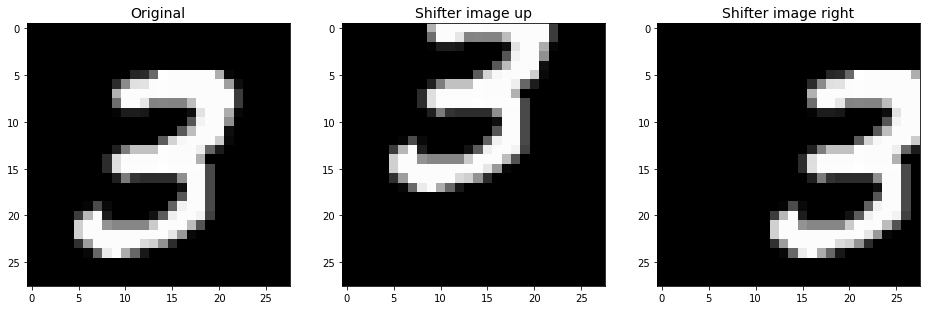

In [ ]:
img=x_train[7].reshape(28,28)
shifted_image_up=shift_image(img,0,-7)
shifted_image_right=shift_image(img,7,0)
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.title('Original',fontsize=14)
plt.imshow(img,interpolation='nearest',cmap='gray')
plt.subplot(132)
plt.title("Shifter image up",fontsize=14)
plt.imshow(shifted_image_up.reshape(28,28),interpolation='nearest',cmap='gray')
plt.subplot(133)
plt.title('Shifter image right',fontsize=14)
plt.imshow(shifted_image_right.reshape(28,28),interpolation='nearest',cmap='gray')
plt.show()

In [ ]:
x_train_augmented=[image for image in x_train]
y_train_augmented=[label for label in y_train]

for dx,dy in ((-2,0),(0,-2),(2,0),(0,2)):
  for image, label in zip(x_train,y_train):
   x_train_augmented.append(shift_image(image,dx,dy))
   y_train_augmented.append(label)
x_train_augmented=np.array(x_train_augmented)
y_train_augmented=np.array(y_train_augmented)

In [ ]:
shuffle_idx=np.random.permutation(len(x_train_augmented))
x_train_augmented=x_train_augmented[shuffle_idx]
y_train_augmented=y_train_augmented[shuffle_idx]

K_classifier=KNeighborsClassifier(**grid_search.best_params_)
K_classifier.fit(x_train_augmented,y_train_augmented)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
y_pred=K_classifier.predict(x_test.reshape(-1,784))

In [ ]:
accuracy_score(y_pred,y_test)

0.9687

# Project:Titanic - Machine Learning from Disaster

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_df=pd.read_csv('/content/drive/My Drive/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df=pd.read_csv('/content/drive/My Drive/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df=train_df.set_index('PassengerId')
test_df=test_df.set_index('PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([('Imputer',SimpleImputer(strategy='median')),
                   ('Standard Scaler',StandardScaler())])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline=Pipeline([('IMputer',SimpleImputer(strategy='most_frequent')),
                       ('encoder',OneHotEncoder(sparse=False))])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs=['Age','Parch','SibSp','Fare']
cat_attribs=['Embarked','Sex','Pclass']
full_pipeline=ColumnTransformer([('num',num_pipeline,num_attribs),
                                 ('cat',cat_pipeline,cat_attribs)])

In [ ]:
X_train=full_pipeline.fit_transform(train_df[num_attribs+cat_attribs])
X_train

array([[-0.56573646, -0.47367361,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103, -0.47367361,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.47367361, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  2.00893337,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.47367361, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.47367361, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
y_train=train_df['Survived']

In [ ]:
K_clf=KNeighborsClassifier(n_neighbors=10)
K_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
X_test=full_pipeline.fit_transform(test_df[num_attribs+cat_attribs])
y_pred=K_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
KNN_score=cross_val_score(K_clf,X_train,y_train,cv=10)
KNN_score.mean()

0.8092259675405744

# Build a spam classifier

In [ ]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT='https://spamassassin.apache.org/old/publiccorpus/'
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")
def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [ ]:
fetch_spam_data()

In [ ]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [ ]:
len(ham_filenames)

2500

In [ ]:
len(spam_filenames)

500